In [1]:
%run ../../common/import_all.py

from common.setup_notebook import set_css_style, setup_matplotlib, config_ipython
config_ipython()
setup_matplotlib()
set_css_style()

# The Monte Carlo method

## What is

The Monte Carlo is a probability-based method, very popular in Physics circles, to perform numerical estimations of quantities. It relies on the very simple idea of *repeated random sampling* and is often used to estimate integrals. In practice, what you do is drawing a lot of random numbers, and observing the number of them which respect a certain property, property that will give you the estimate of the quantity you're looking for and that is difficult to calculate analytically. 

The method is a very simple and elegant one, and this is why it's one of the silver bullets of Physics. It was proposed by S Ulam while working on military-related projects at the Los Alamos labs in 1940 and became a big contributor to the work of the Project Manhattan. The name is a clear reference to the casino in Monaco.

### A silly example: Estimating $\pi$

This is a pedagogical example, cited in many places, for instance Wikipedia [[1]](#wiki). Because of the relation linking $\pi$ to the area $A$ of a circle of radius $r$, namely

$$
A = \pi r^2 \ ,
$$

we can easily estimate $\pi$ via considering a circle inscribed in a square. The area of the square would simply be $r^2$, hence the ratio of the two areas comes down to $pi$. With a similar argument, we can consider a quarter of a circle inscribed in a square of side 1. The ratio of the areas would be $\frac{\pi}{4}$, so this ratio, found numerically, multiplied by 4 would give us the sought estimate of $\pi$.

For other examples, see [[2]](#slides).

In [10]:
def f_quartercircle(x):
    """Quarter of a cirle in the first quadrant."""
    return np.sqrt(1-x**2)


# get 1000 numbers between 0 and 1, equally spaced, and the quarter circle function on them
x = np.linspace(0, 1, num=1000)
y = [f_quartercircle(item) for item in x]

# loop over the number of extracted points, and extract them uniformly between 0 and 1, both x and y
for n in [100, 1000, 5000, 10000, 20000, 30000, 50000]:
    
    points = np.random.uniform(0, 1, size=(n, 2))     # n points in the plane, randomly (uniformly) extracted in [0,1]
    
    under_points = []
    over_points = []
    
    # select if point is below or above the circle
    for point in points:
        if point[1] <= f_quartercircle(point[0]):
            under_points.append(point)
        else:
            over_points.append(point)

    # estimate pi as the ratio of number of points below circle to total
    est_pi = float(len(under_points)) / n * 4
    
    # compute the relative error to the real pi, in percentage
    perc_err = abs(float(est_pi - np.pi))/np.pi
    print('Estimated pi at %d points: %f, with relative error %f' %(n, est_pi, perc_err))

Estimated pi at 100 points: 3.000000, with relative error 0.045070
Estimated pi at 1000 points: 3.088000, with relative error 0.017059
Estimated pi at 5000 points: 3.139200, with relative error 0.000762
Estimated pi at 10000 points: 3.131600, with relative error 0.003181
Estimated pi at 20000 points: 3.149400, with relative error 0.002485
Estimated pi at 30000 points: 3.138533, with relative error 0.000974
Estimated pi at 50000 points: 3.127520, with relative error 0.004479


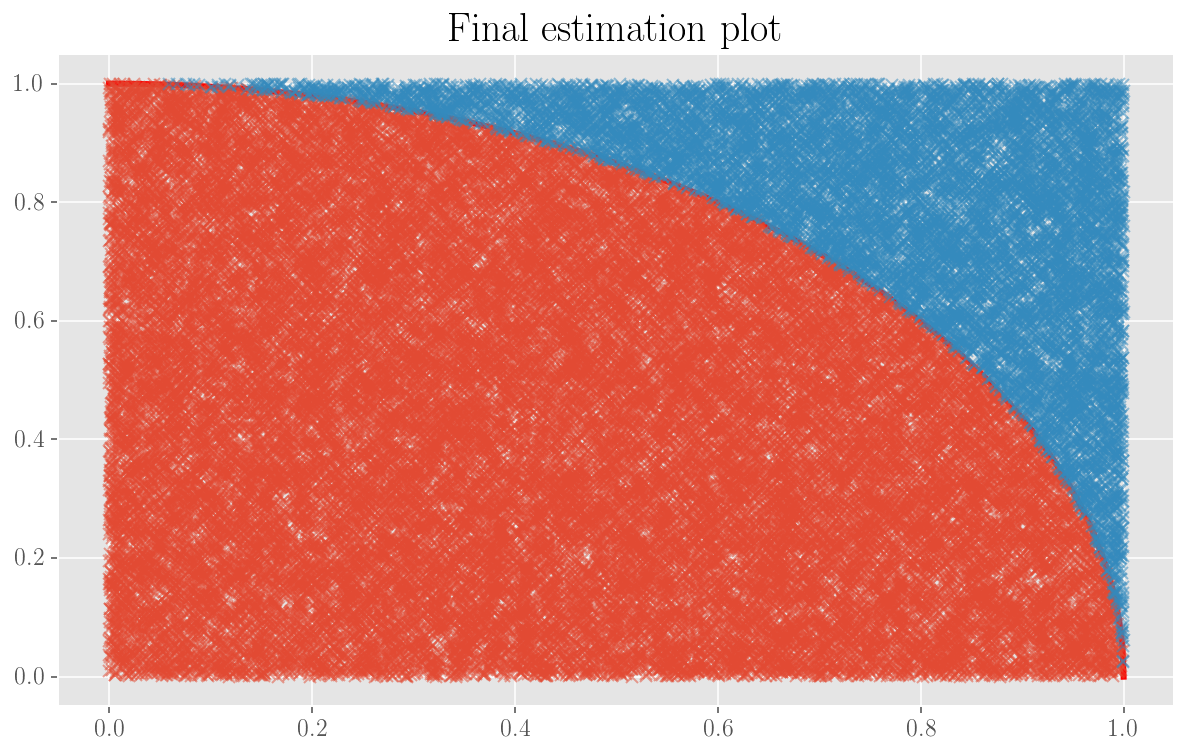

In [9]:
plt.title('Final estimation plot')
plt.plot(x, y, color='r', lw=3)
plt.plot([point[0] for point in under_points], [point[1] for point in under_points], 'x', alpha=0.5)
plt.plot([point[0] for point in over_points], [point[1] for point in over_points], 'x', alpha=0.5)
plt.show();

## References

1. <a name="wiki"></a> [Wikipedia on the Monte Carlo method](https://en.wikipedia.org/wiki/Monte_Carlo_method)
2. <a name="slides"></a> [Some useful slides on the method, with examples, from the University of Geneva](https://www.unige.ch/sciences/astro/files/2713/8971/4086/3_Paltani_MonteCarlo.pdf)